**I. INTRODUCTION**

Name = Nisa Aprilia M 

FTDS Batch #004

**II. IMPORT LIBRARIES**

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import PIL
from PIL import Image
import sympy as sy
from sympy.tensor.array import derive_by_array
from scipy import ndimage
from google.colab import files
import cv2

**III. DATA LOADING**

In [133]:
# Open the image form local directory
image = files.upload()

Saving dog.jpg to dog (2).jpg


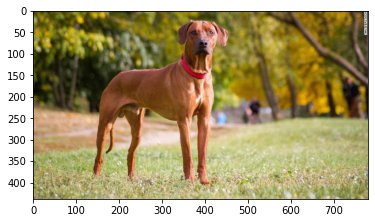

In [134]:
img = Image.open('dog (1).jpg')
plt.imshow(img)

**IV. DATA PREPROCESSING**

In [135]:
# convert image to numpy array
data1 = np.asarray(img)
print(type(data1))
print(data1)
print(data1.shape)

<class 'numpy.ndarray'>
[[[ 86  93  39]
  [ 88  93  39]
  [ 87  90  33]
  ...
  [ 48  41  15]
  [ 46  39  10]
  [ 59  52  23]]

 [[ 77  84  30]
  [ 77  84  30]
  [ 78  83  25]
  ...
  [ 46  39  13]
  [ 64  57  29]
  [ 37  30   1]]

 [[ 64  73  20]
  [ 66  73  19]
  [ 68  73  17]
  ...
  [ 56  48  25]
  [ 44  37   9]
  [ 70  60  33]]

 ...

 [[165 151 106]
  [159 144 101]
  [151 134  91]
  ...
  [150 139  85]
  [149 138  84]
  [145 134  80]]

 [[164 149 106]
  [157 142  99]
  [149 131  91]
  ...
  [155 143  93]
  [153 141  89]
  [148 136  84]]

 [[164 149 108]
  [157 142 101]
  [146 131  90]
  ...
  [160 148 100]
  [157 145  97]
  [150 138  90]]]
(438, 780, 3)


**V. DATA PROCESSING**

In [136]:
# convert picture into GrayScale
imgGray = Image.open('dog.jpg').convert('L')

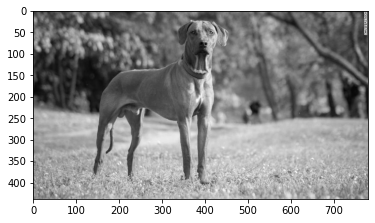

In [137]:
plt.imshow(imgGray,cmap=plt.cm.gray)

1) Hitung vektor gradien(turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y dengan rumus: 𝜕𝐼/𝜕𝑥 , 𝜕𝐼/𝜕𝑦

In [138]:
# convert gray image to numpy array
data = np.asarray(imgGray)
print(type(data))
print(data)
print(data.shape)

<class 'numpy.ndarray'>
[[ 85  85  83 ...  39  39  56]
 [ 76  76  75 ...  41  56  24]
 [ 64  65  65 ...  44  35  62]
 ...
 [150 144 134 ... 135 135 131]
 [149 142 132 ... 141 140 136]
 [149 142 131 ... 147 145 139]]
(438, 780)


In [139]:
# compute gradient of image
gx, gy = np.gradient(data)
print ("gx =", gx)
print ("gy =", gy)

gx = [[ -9.   -9.   -8.  ...   2.   17.  -32. ]
 [-10.5 -10.   -9.  ...   2.5  -2.    3. ]
 [ -9.   -9.   -8.  ... 107.  -13.5  27. ]
 ...
 [ -0.5  -2.   -2.5 ...   2.5   2.5   2.5]
 [ -0.5  -1.   -1.5 ...   6.    5.    4. ]
 [  0.    0.   -1.  ...   6.    5.    3. ]]
gy = [[  0.   -1.   -2.5 ...   0.    8.5  17. ]
 [  0.   -0.5  -1.  ...   4.   -8.5 -32. ]
 [  1.    0.5   0.5 ...  -0.5   9.   27. ]
 ...
 [ -6.   -8.   -9.5 ...   1.5  -2.   -4. ]
 [ -7.   -8.5  -8.5 ...   0.5  -2.5  -4. ]
 [ -7.   -9.   -9.  ...   0.   -4.   -6. ]]


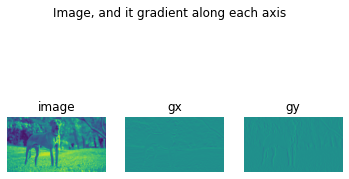

In [140]:
# plotting
plt.close("all")
plt.figure()
plt.suptitle("Image, and it gradient along each axis")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(data)
ax.set_title("image")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(gx)
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(gy)
ax.set_title("gy")
plt.show()

2) Hitung gradient magnitude tiap pixel dengan rumus: √𝜕𝐼/𝜕𝑥 + 𝜕𝐼/𝜕𝑦



In [141]:
# create a function to calculate gradient magnitude
def gradmag(gx, gy):
  '''function to to calculate gradient magnitude of gx and gy'''
  return np.sqrt((gx)**2 + (gy)**2)


print(gradmag(gx, gy)) 

[[  9.           9.05538514   8.38152731 ...   2.          19.00657781
   36.23534186]
 [ 10.5         10.0124922    9.05538514 ...   4.71699057   8.7321246
   32.14031736]
 [  9.05538514   9.01387819   8.01560977 ... 107.00116822  16.22498074
   38.18376618]
 ...
 [  6.02079729   8.24621125   9.82344135 ...   2.91547595   3.20156212
    4.71699057]
 [  7.01783442   8.55862138   8.63133825 ...   6.02079729   5.59016994
    5.65685425]
 [  7.           9.           9.05538514 ...   6.           6.40312424
    6.70820393]]


4) Untuk operasi matriks, buat matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan sesuai dengan aturan perkalian matriks.


Original picture: AxesImage(54,36;334.8x217.44)


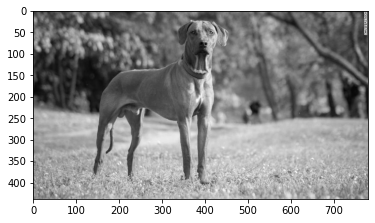

In [142]:
ori = plt.imshow(imgGray, cmap=plt.cm.gray)
print('Original picture:', ori)